# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [31]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
#Didn't find a validation set in the pickled data set
#Generate validation set folds from training data

training_file = './data/train.p'
validation_file= ''
testing_file = './data/test.p'


training_file_v2 = './data/train.p2'
testing_file_v2 = './data/test.p2'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
#with open(validation_file, mode='rb') as f:
#    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
with open(training_file_v2, mode='wb') as f:
    pickle.dump(train,f,protocol=2)
#with open(validation_file, mode='rb') as f:
#    valid = pickle.load(f)
with open(testing_file_v2, mode='wb') as f:
    pickle.dump(test,f,protocol=2)

ValueError: unsupported pickle protocol: 3

In [32]:
import pickle

training_file_v2 = './data/train.p2'
testing_file_v2 = './data/test.p2'

with open(training_file_v2, mode='rb') as f:
    train = pickle.load(f)
#with open(validation_file, mode='rb') as f:
#    valid = pickle.load(f)
with open(testing_file_v2, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
#X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [33]:
import numpy as np
len(np.unique(y_train))

43

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [34]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

image_size = image_shape[0]
num_labels = n_classes
num_channels = image_shape[2] 


('Number of training examples =', 39209)
('Number of testing examples =', 12630)
('Image data shape =', (32, 32, 3))
('Number of classes =', 43)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

(array([  210.,  2220.,  2250.,  1410.,  1980.,  1860.,   420.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   780.,   630.,
          420.,  1110.,  1200.,   210.,   360.,   330.,   390.,   510.,
          270.,  1500.,   600.,   240.,   540.,   270.,   450.,   780.,
          240.,   689.,   420.,  1200.,   390.,   210.,  2070.,   300.,
          360.,   240.,   240.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

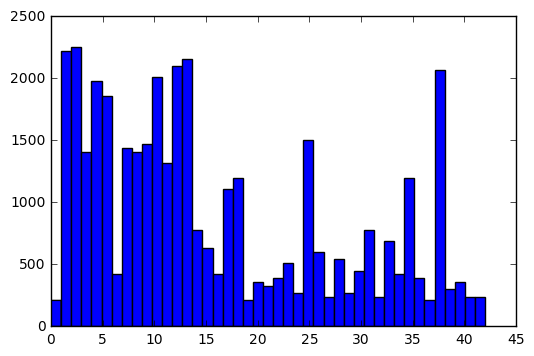

In [35]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.hist(y_train,n_classes)

In [36]:
import pandas as pd
sign_names_df = pd.read_csv('signnames.csv')
print(sign_names_df)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [37]:
u_classes = np.unique(y_train,return_counts=1)
type(u_classes)
u_df = pd.DataFrame(u_classes[1],u_classes[0])
u_df
sign_names_df['count'] = u_df[0]
sign_names_df.describe
sign_names_df['count'].values.tolist()

[210,
 2220,
 2250,
 1410,
 1980,
 1860,
 420,
 1440,
 1410,
 1470,
 2010,
 1320,
 2100,
 2160,
 780,
 630,
 420,
 1110,
 1200,
 210,
 360,
 330,
 390,
 510,
 270,
 1500,
 600,
 240,
 540,
 270,
 450,
 780,
 240,
 689,
 420,
 1200,
 390,
 210,
 2070,
 300,
 360,
 240,
 240]

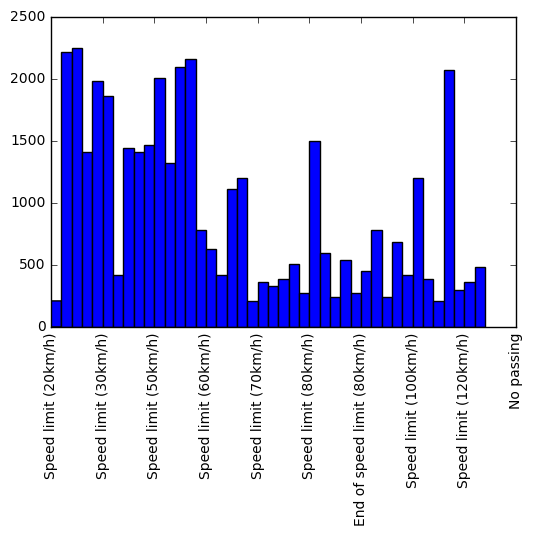

In [38]:
fig = plt.subplot(111)
fig.hist(y_train,42)
fig.set_xticklabels(sign_names_df['SignName'].values.tolist(),rotation=90)
plt.show()

6490
(32, 32, 3)


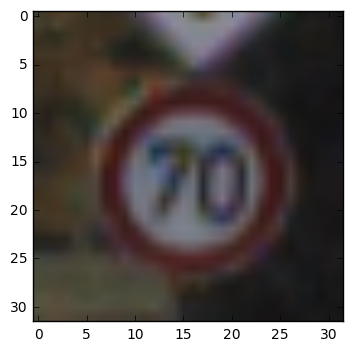

In [39]:
sample_idx = np.random.randint(X_train.shape[0])  # pick a random image index
print(sample_idx)
sample_image = X_train[sample_idx, :, : ]  # extract a 2D slice
plt.figure()
print(sample_image.shape)
plt.imshow(sample_image,cmap='gray')  # display it


In [40]:
X_train.shape

(39209, 32, 32, 3)

In [41]:
y_train.reshape(39209,-1)

array([[ 0],
       [ 0],
       [ 0],
       ..., 
       [42],
       [42],
       [42]], dtype=uint8)

In [42]:
yy = y_train.reshape( y_train.shape[0],-1)
yy.shape
yy=yy.reshape(-1,y_train.shape[0])
yy.shape

(1, 39209)

In [43]:
#Build Validation set, by randomly picking entries from training set
#Steps: Concatenate features + label data
VALIDATE_SET_PERCENTAGE = 30

training_data_shape = X_train.shape
num_training_samples = training_data_shape[0]
num_features = training_data_shape[1]*training_data_shape[2]*training_data_shape[3]
X_train_flat = X_train.reshape(num_training_samples,num_features)
X_train_label_combined = np.hstack((X_train_flat,y_train.reshape( y_train.shape[0],-1)))
np.random.shuffle(X_train_label_combined)
X_train_shuffle = X_train_label_combined[:,0:-1]
y_train_shuffle = X_train_label_combined[:,-1].reshape(num_training_samples,-1)
X_train_shuffle = X_train_shuffle.reshape(num_training_samples,
                                          training_data_shape[1],
                                          training_data_shape[2],
                                          training_data_shape[3])
#We have shuffled the training set, so now pick 30% as the validation set
num_validate = num_training_samples*VALIDATE_SET_PERCENTAGE//100
X_validate = X_train_shuffle[0:num_validate,:,:,:]
y_validate = y_train_shuffle[0:num_validate,:]
X_train_use = X_train_shuffle[num_validate:,:,:,:]
y_train_use = y_train_shuffle[num_validate:,:]
print(X_validate.shape)
print(y_validate.shape)
print(X_train_use.shape)
print(y_train_use.shape)    


(11762, 32, 32, 3)
(11762, 1)
(27447, 32, 32, 3)
(27447, 1)


In [44]:
y_test = y_test.reshape(y_test.shape[0],-1)

def one_hot(labels):
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return labels
y_train_use = one_hot(y_train_use).reshape(y_train_use.shape[0],num_labels)
y_validate = one_hot(y_validate).reshape(y_validate.shape[0],num_labels)
y_test_use = one_hot(y_test).reshape(y_test.shape[0],num_labels)
print(y_train_use.shape)
print(y_validate.shape)
print(y_test_use.shape)

(27447, 43)
(11762, 43)
(12630, 43)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [45]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#Flip images
#Wait this doesn't make sense, left ,right turns, speed limit signs will no longer make sense

#Mean normalization around 0, with stdev of 1
def normalize(data):
    data = data - np.mean(data,axis=0)
    data /= np.std(data,axis=0)
    return data

#Refer to tensorflow tutorial/cs231n notes on preprocessing
#2. PCA whitening


In [62]:
train_dataset = normalize(X_train_use.astype(np.float32))
train_labels = y_train_use.astype(np.float32)

valid_dataset = normalize(X_validate.astype(np.float32))
valid_labels = y_validate.astype(np.float32)

test_dataset = normalize(X_test.astype(np.float32))
test_labels =  y_test_use.astype(np.float32)

In [63]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [64]:
#To not use GPU, on macbook, GPU memory of 512 MB is too little for most apps.
config = tf.ConfigProto(device_count = {'GPU': 0} )

batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64

(batch_size, image_size, image_size, num_channels)
[patch_size, patch_size, num_channels, depth]

[5, 5, 3, 16]

### Model Architecture

In [65]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth]))

  layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth, depth], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))

  layer3_weights = tf.Variable(tf.truncated_normal(
      [image_size // 4 * image_size // 4 * depth, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))

  layer4_weights = tf.Variable(tf.truncated_normal(
      [num_hidden, num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
    print(conv.shape)
    hidden = tf.nn.relu(conv + layer1_biases)
    
    conv = tf.nn.conv2d(hidden, layer2_weights, [1, 2, 2, 1], padding='SAME')
    print(conv.shape)

    hidden = tf.nn.relu(conv + layer2_biases)
    
    shape = hidden.get_shape().as_list()
    print(shape)
    
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
    print(reshape.shape)
    
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

(16, 16, 16, 16)
(16, 8, 8, 16)
[16, 8, 8, 16]
(16, 1024)
(11762, 16, 16, 16)
(11762, 8, 8, 16)
[11762, 8, 8, 16]
(11762, 1024)
(12630, 16, 16, 16)
(12630, 8, 8, 16)
[12630, 8, 8, 16]
(12630, 1024)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [66]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
num_steps = 1001

with tf.Session(graph=graph,config=config) as session:
  #tf.global_variables_initializer().run()
  tf.initialize_all_variables().run() 
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 50 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
Minibatch loss at step 0: 6.360429
Minibatch accuracy: 0.0%
Validation accuracy: 1.7%
Minibatch loss at step 50: 3.343046
Minibatch accuracy: 18.8%
Validation accuracy: 14.3%
Minibatch loss at step 100: 3.003329
Minibatch accuracy: 25.0%
Validation accuracy: 26.1%
Minibatch loss at step 150: 2.807694
Minibatch accuracy: 25.0%
Validation accuracy: 32.4%
Minibatch loss at step 200: 1.389082
Minibatch accuracy: 56.2%
Validation accuracy: 44.2%
Minibatch loss at step 250: 1.391539
Minibatch accuracy: 68.8%
Validation accuracy: 51.6%
Minibatch loss at step 300: 2.703795
Minibatch accuracy: 25.0%
Validation accuracy: 53.2%
Minibatch loss at step 350: 1.139269
Minibatch accuracy: 62.5%
Validation accuracy: 58.2%
Minibatch loss at step 400: 0.335000
Minibatch accuracy: 93.8%
Validation accuracy: 66.5%
Minibatch loss at step 450: 1.063087
Minibatch accuracy: 56.2%
Validation accuracy: 61.3%
Minibatch loss at s

In [68]:
#To not use GPU, on macbook, GPU memory of 512 MB is too little for most apps.
config = tf.ConfigProto(device_count = {'GPU': 0} )

batch_size = 64
patch_size = 5
depth = 32
num_hidden = 128
keep_probab = 0.5
starter_learning_rate = 0.1
graph = tf.Graph()

with graph.as_default():

  global_step = tf.Variable(0)  # count the number of steps taken.
  learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 100, 0.96, staircase=True)

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth]))
  layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth, depth], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
  layer3_weights = tf.Variable(tf.truncated_normal(
      [image_size // 4 * image_size // 4 * depth, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer4_weights = tf.Variable(tf.truncated_normal(
      [num_hidden, num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data,keep_probab=1.0):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer1_biases)
    maxp_hidden = tf.nn.max_pool(tf.nn.dropout(hidden,keep_probab),[1,2,2,1],[1,2,2,1],padding='SAME')
    
    conv = tf.nn.conv2d(maxp_hidden, layer2_weights, [1, 1, 1, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    
    maxp_hidden = tf.nn.max_pool(tf.nn.dropout(hidden,keep_probab),[1,2,2,1],[1,2,2,1],padding='SAME')
    
    shape = maxp_hidden.get_shape().as_list()
    reshape = tf.reshape(maxp_hidden, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    
    return tf.matmul(tf.nn.dropout(hidden,keep_probab), layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

num_steps = 3001

with tf.Session(graph=graph,config=config) as session:
  #tf.global_variables_initializer().run()
  tf.initialize_all_variables().run() 
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 50 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
Minibatch loss at step 0: 10.083325
Minibatch accuracy: 6.2%
Validation accuracy: 5.7%
Minibatch loss at step 50: 3.933762
Minibatch accuracy: 6.2%
Validation accuracy: 5.3%
Minibatch loss at step 100: 3.504016
Minibatch accuracy: 3.1%
Validation accuracy: 5.4%
Minibatch loss at step 150: 4.031465
Minibatch accuracy: 3.1%
Validation accuracy: 5.4%
Minibatch loss at step 200: 3.503316
Minibatch accuracy: 7.8%
Validation accuracy: 5.4%
Minibatch loss at step 250: 3.478951
Minibatch accuracy: 7.8%
Validation accuracy: 5.5%
Minibatch loss at step 300: 3.563818
Minibatch accuracy: 6.2%
Validation accuracy: 5.7%
Minibatch loss at step 350: 3.540339
Minibatch accuracy: 1.6%
Validation accuracy: 5.3%
Minibatch loss at step 400: 3.511203
Minibatch accuracy: 7.8%
Validation accuracy: 7.5%
Minibatch loss at step 450: 3.511900
Minibatch accuracy: 7.8%
Validation accuracy: 5.9%
Minibatch loss at step 500: 3.559484

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [6]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 